Importing Pandas and matplotlib for basic EDA on Food supply chain dataset.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

Reading the dataset from "https://www.fao.org/platform-food-loss-waste/flw-data/en/" and download it to the local.The Classiifcation should also be done classifying items to Dry Cereals, Fruits, Vegetables, Milk, Egg and Meat using Excel file.

In [24]:
df = pd.read_csv("Food_Supply_Chain.csv")
print (df)

       geographicaream49  country          crop Classiifcation  \
0                  108.0  Burundi         Wheat    Dry Cereals   
1                  108.0  Burundi         Wheat    Dry Cereals   
2                  108.0  Burundi         Wheat    Dry Cereals   
3                  108.0  Burundi         Wheat    Dry Cereals   
4                  108.0  Burundi         Wheat    Dry Cereals   
...                  ...      ...           ...            ...   
10335              854.0   Zambia  Maize (corn)    Dry Cereals   
10336              854.0   Zambia  Maize (corn)    Dry Cereals   
10337              854.0   Zambia  Maize (corn)    Dry Cereals   
10338              854.0   Zambia  Maize (corn)    Dry Cereals   
10339              854.0   Zambia  Maize (corn)    Dry Cereals   

       timepointyears  percentage_loss_of_quantity fsc_location1  
0                2011                          2.7     Wholesale  
1                2011                          3.5          Farm  
2     

In [25]:
#Finding the unique country list to group by countries
country_list = df['country'].unique()
print(country_list)

['Burundi' 'Cambodia' 'Algeria' 'Cameroon' 'Sri Lanka' 'Chad' 'Chile'
 'China' 'Colombia' 'Democratic Republic of the Congo' 'Costa Rica' 'Cuba'
 'Benin' 'Denmark' 'Ecuador' 'El Salvador' 'Ethiopia' 'Eritrea' 'Angola'
 'Fiji' 'Finland' 'Gabon' 'Gambia' 'Ghana' 'Azerbaijan' 'Guatemala'
 'Guinea' 'Guyana' 'Honduras' 'India' 'Australia' 'Indonesia'
 'Iran (Islamic Republic of)' "C√¥te d'Ivoire" 'Kazakhstan' 'Austria'
 'Jordan' 'Kenya' "Democratic People's Republic of Korea"
 'Republic of Korea' "Lao People's Democratic Republic" 'Lesotho'
 'Liberia' 'Madagascar' 'Malawi' 'Malaysia' 'Mali' 'Mauritania' 'Bahrain'
 'Mexico' 'Bangladesh' 'Mozambique' 'Oman' 'Namibia' 'Nepal' 'New Zealand'
 'Nicaragua' 'Niger' 'Nigeria' 'Norway' 'Pakistan' 'Panama' 'Peru'
 'Philippines' 'Guinea-Bissau' 'Timor-Leste' 'Rwanda' 'Saint Lucia'
 'Bolivia (Plurinational State of)' 'Senegal' 'Sierra Leone' 'Viet Nam'
 'Somalia' 'South Africa' 'Zimbabwe' 'Botswana' 'South Sudan' 'Sudan'
 'Eswatini' 'Sweden' 'Switzerlan

In [4]:
#The raw dataset has multiple food supply chain location fsc_location1 and 
#we are grouping them using the maximum percentage of loss
grouped_1 = df.groupby(['country','crop','timepointyears','fsc_location1'])['percentage_loss_of_quantity'].max()
print(grouped_1)

country   crop          timepointyears  fsc_location1   
Algeria   Potatoes      2005            WholeSupplyChain    25.0
Angola    Maize (corn)  2003            Farm                 4.0
                                        Harvest              6.4
                                        Storage              4.8
                                        Transport            1.7
                                                            ... 
Zimbabwe  Sorghum       2015            Farm                 3.6
                                        Harvest              4.6
                                        Storage              3.4
                                        Transport            1.0
                                        Wholesale            2.7
Name: percentage_loss_of_quantity, Length: 7945, dtype: float64


####
The classification of crops to Dry Cereals, Fruits, Vegetables, Milk, Egg and Meat is done and
here we are grouping the data using Geographic area, country, crop, classification, Years, Food supply location with maximum percentage of loss
####

In [5]:
df_group = df.groupby(['geographicaream49','country','crop','Classiifcation','timepointyears','fsc_location1']).agg({'percentage_loss_of_quantity':'max'})
df_new = pd.DataFrame(df_group).reset_index()
print(df_new)


      geographicaream49   country          crop Classiifcation  \
0                   1.0   Lesotho       Sorghum    Dry Cereals   
1                  12.0  Cameroon  Maize (corn)    Dry Cereals   
2                  24.0    Angola  Maize (corn)    Dry Cereals   
3                  24.0    Angola  Maize (corn)    Dry Cereals   
4                  24.0    Angola  Maize (corn)    Dry Cereals   
...                 ...       ...           ...            ...   
7936              854.0    Zambia  Maize (corn)    Dry Cereals   
7937              854.0    Zambia  Maize (corn)    Dry Cereals   
7938              854.0    Zambia  Maize (corn)    Dry Cereals   
7939              854.0    Zambia  Maize (corn)    Dry Cereals   
7940              854.0    Zambia  Maize (corn)    Dry Cereals   

      timepointyears fsc_location1  percentage_loss_of_quantity  
0               2010          Farm                          2.2  
1               2013       Storage                          7.1  
2        

In [6]:
df_new.to_csv('out.csv',index=False) #Output the file to df_new.csv

Trying to plot the data from years 2014 to 2018 and creating a new dataframe for that timeframe.

In [8]:
df_1418 = df_new[df_new['timepointyears']>=2014]
print(df_1418)

      geographicaream49       country                        crop  \
163                24.0       Finland         Carrots and turnips   
164                24.0       Finland         Carrots and turnips   
165                24.0       Finland  Onions and shallots, green   
166                24.0       Finland          Other fruits, n.e.   
168                24.0       Finland                   Peas, dry   
...                 ...           ...                         ...   
7806              840.0  Burkina Faso                     Sorghum   
7807              840.0  Burkina Faso                     Sorghum   
7808              840.0  Burkina Faso                     Sorghum   
7809              840.0  Burkina Faso                     Sorghum   
7810              840.0  Burkina Faso                     Sorghum   

     Classiifcation  timepointyears fsc_location1  percentage_loss_of_quantity  
163      Vegetables            2017          Farm                         15.0  
164      

In [9]:
#Calculating the mean percentage loss for each country
df_gb = pd.DataFrame(df_1418.groupby(['country']).agg({'percentage_loss_of_quantity':'mean'})).reset_index()
print(df_gb)

                                  country  percentage_loss_of_quantity
0                               Australia                    77.650000
1                              Bangladesh                    13.196250
2                                   Benin                    28.100000
3                            Burkina Faso                     2.605714
4                                   Chile                     3.500000
5                                   China                     3.300000
6                                Colombia                     7.923333
7                              Costa Rica                     6.500000
8   Democratic People's Republic of Korea                    16.315000
9                                 Denmark                    13.933333
10                                Ecuador                     4.616667
11                               Ethiopia                     3.629167
12                                Finland                    10.580000
13    

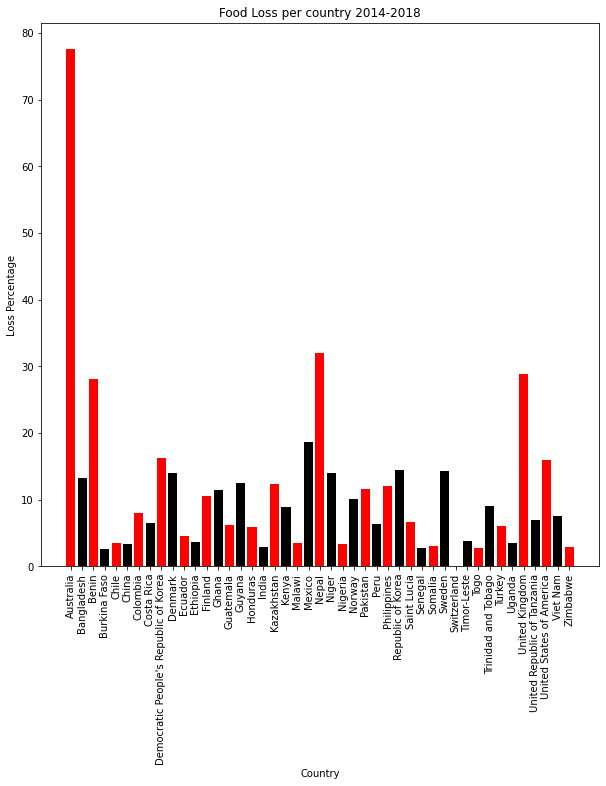

In [10]:
#Plotting the Food loss per country 2014-2018

x_ax = df_gb['country']
leng = len(x_ax) + 10
y_ax = df_gb['percentage_loss_of_quantity']
plt.figure(figsize=(10,10))
plt.bar(range(len(x_ax)),y_ax,color=['red','black'])
plt.xticks(range(len(x_ax)),x_ax, rotation='vertical')
plt.xlabel('Country')
plt.ylabel('Loss Percentage')
plt.title("Food Loss per country 2014-2018")
plt.show()

In [11]:
#choosing 2 random countries to be plotted and 
#below few plots would show Top 5 years with low loss and high loss for these 2 countries.

df_c1 = df_new[df_new['country']=='Cameroon']
print(df_c1)
df_c2 = df_new[df_new['country']=='Nigeria']
print(df_c2)


     geographicaream49   country          crop Classiifcation  timepointyears  \
1                 12.0  Cameroon  Maize (corn)    Dry Cereals            2013   
613              116.0  Cameroon  Maize (corn)    Dry Cereals            2013   
614              116.0  Cameroon  Maize (corn)    Dry Cereals            2013   
615              116.0  Cameroon  Maize (corn)    Dry Cereals            2013   
616              116.0  Cameroon  Maize (corn)    Dry Cereals            2013   
..                 ...       ...           ...            ...             ...   
743              120.0  Cameroon       Sorghum    Dry Cereals            2010   
744              120.0  Cameroon       Sorghum    Dry Cereals            2010   
745              120.0  Cameroon       Sorghum    Dry Cereals            2010   
746              120.0  Cameroon       Sorghum    Dry Cereals            2010   
747              120.0  Cameroon       Sorghum    Dry Cereals            2010   

    fsc_location1  percenta

In [12]:
df_cp1 = pd.DataFrame(df_c1.groupby(['timepointyears']).agg({'percentage_loss_of_quantity':'mean'})).reset_index()
print(df_cp1)
df_high1 = df_cp1.tail(5)
print(df_high1)
df_low1 = df_cp1.head(5)
print(df_low1)

    timepointyears  percentage_loss_of_quantity
0             2003                     3.100000
1             2004                     3.100000
2             2005                     3.100000
3             2006                     3.100000
4             2007                     3.100000
5             2008                     3.120000
6             2009                     3.120000
7             2010                     3.120000
8             2011                     4.000000
9             2012                     4.000000
10            2013                     9.166667
    timepointyears  percentage_loss_of_quantity
6             2009                     3.120000
7             2010                     3.120000
8             2011                     4.000000
9             2012                     4.000000
10            2013                     9.166667
   timepointyears  percentage_loss_of_quantity
0            2003                          3.1
1            2004                         

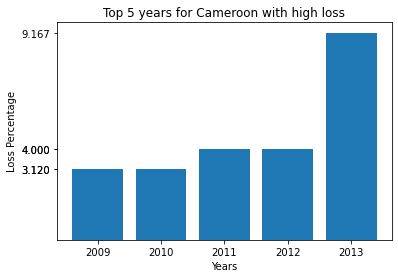

In [13]:
x_ax = df_high1['timepointyears']
leng = len(x_ax) + 10
y_ax = df_high1['percentage_loss_of_quantity']
#plt.figure(figsize=(10,10))
plt.bar(x_ax,y_ax)
plt.xticks()
plt.yticks(y_ax)
plt.xlabel('Years')
plt.ylabel('Loss Percentage')
plt.title("Top 5 years for Cameroon with high loss")
plt.show()

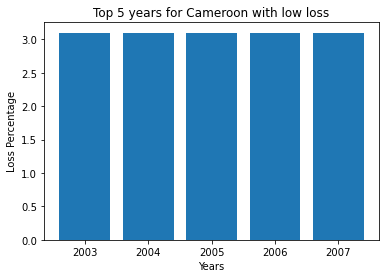

In [14]:
x_ax = df_low1['timepointyears']
leng = len(x_ax) + 10
y_ax = df_low1['percentage_loss_of_quantity']
#plt.figure(figsize=(5,5))
plt.bar(x_ax,y_ax)
plt.xticks()
#plt.yticks(y_ax)
plt.xlabel('Years')
plt.ylabel('Loss Percentage')
plt.title("Top 5 years for Cameroon with low loss")
plt.show()

In [15]:
df_cp2 = pd.DataFrame(df_c2.groupby(['timepointyears']).agg({'percentage_loss_of_quantity':'mean'})).reset_index()
df_cp2 = df_cp2.sort_values(by = ['percentage_loss_of_quantity'])
print(df_cp2)
df_high2 = df_cp2.tail(5)
print(df_high2)
df_low2 = df_cp2.head(5)
print(df_low2)

    timepointyears  percentage_loss_of_quantity
7             2011                     2.810000
4             2008                     2.820000
5             2009                     2.820000
8             2012                     2.830000
1             2004                     2.845000
2             2005                     2.845000
3             2006                     2.845000
0             2003                     2.850000
10            2014                     3.216333
11            2015                     3.430000
9             2013                     4.546000
12            2016                     4.700000
6             2010                     8.295161
    timepointyears  percentage_loss_of_quantity
10            2014                     3.216333
11            2015                     3.430000
9             2013                     4.546000
12            2016                     4.700000
6             2010                     8.295161
   timepointyears  percentage_loss_of_qu

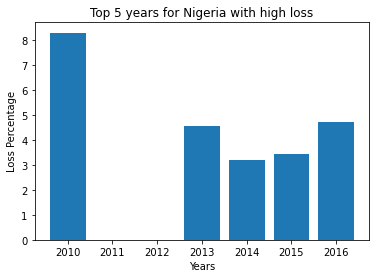

In [16]:
x_ax = df_high2['timepointyears']
leng = len(x_ax) + 10
y_ax = df_high2['percentage_loss_of_quantity']
#plt.figure(figsize=(10,10))
plt.bar(x_ax,y_ax)
plt.xticks()
#plt.yticks(y_ax)
plt.xlabel('Years')
plt.ylabel('Loss Percentage')
plt.title("Top 5 years for Nigeria with high loss")
plt.show()

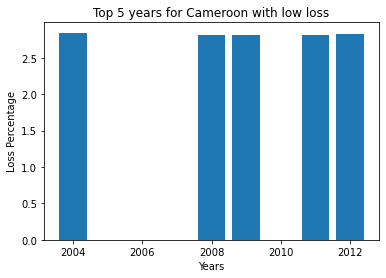

In [17]:
x_ax = df_low2['timepointyears']
leng = len(x_ax) + 10
y_ax = df_low2['percentage_loss_of_quantity']
#plt.figure(figsize=(5,5))
plt.bar(x_ax,y_ax)
plt.xticks()
#plt.yticks(y_ax)
plt.xlabel('Years')
plt.ylabel('Loss Percentage')
plt.title("Top 5 years for Cameroon with low loss")
plt.show()

In [18]:
df_stage = df_new[df_new['country']=='Bangladesh']
print(df_stage)
df_sg1 = pd.DataFrame(df_stage.groupby(['timepointyears','fsc_location1']).agg({'percentage_loss_of_quantity':'mean'})).reset_index()
print(df_sg1)
df_stage1 = df_new[df_new['country']=='Cameroon']
print(df_stage1)
df_sg2 = pd.DataFrame(df_stage1.groupby(['timepointyears','fsc_location1']).agg({'percentage_loss_of_quantity':'mean'})).reset_index()
print(df_sg2)

      geographicaream49     country      crop Classiifcation  timepointyears  \
184                50.0  Bangladesh   Bananas         Fruits            2010   
185                50.0  Bangladesh   Bananas         Fruits            2010   
186                50.0  Bangladesh   Bananas         Fruits            2010   
187                50.0  Bangladesh   Bananas         Fruits            2010   
188                50.0  Bangladesh   Bananas         Fruits            2010   
...                 ...         ...       ...            ...             ...   
3822              484.0  Bangladesh  Tomatoes     Vegetables            2016   
3823              484.0  Bangladesh     Wheat    Dry Cereals            2010   
3824              484.0  Bangladesh     Wheat    Dry Cereals            2010   
3825              484.0  Bangladesh     Wheat    Dry Cereals            2010   
3826              484.0  Bangladesh     Wheat    Dry Cereals            2010   

         fsc_location1  percentage_loss

In [19]:
df_sgnew = df_sg1.pivot_table('percentage_loss_of_quantity', 'timepointyears', 'fsc_location1')
print(df_sgnew)
df_sgnew1 = df_sg2.pivot_table('percentage_loss_of_quantity', 'timepointyears', 'fsc_location1')
print(df_sgnew1)

fsc_location1   Consumer  Distribution       Farm   Harvest  Processing  \
timepointyears                                                            
2004                 NaN           NaN        NaN       NaN         NaN   
2008                 NaN           NaN  41.450000       NaN         NaN   
2009                3.61      0.180000   1.177500   2.12875      2.2850   
2010                 NaN      8.325455   8.846667  30.13500      1.2925   
2012                 NaN           NaN        NaN       NaN         NaN   
2014                 NaN           NaN  25.185000       NaN         NaN   
2016                 NaN      2.600000        NaN       NaN         NaN   

fsc_location1   Restaurants    Retail  Storage  Traders   Traderss  Transport  \
timepointyears                                                                  
2004                    NaN       NaN      NaN      NaN        NaN        NaN   
2008                    NaN       NaN      NaN      NaN        NaN        NaN   


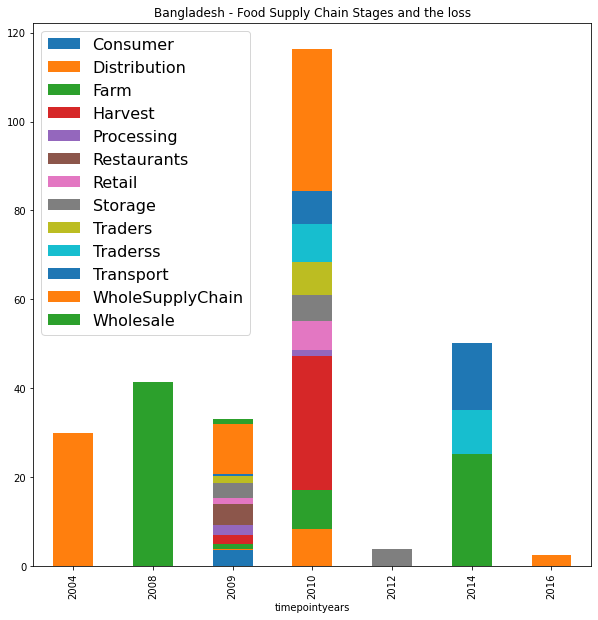

In [26]:
#Plotting Food supply chain stages and the loss for Bangladesh and Cameroon as below. 
#changing the country name in above EDA's would give a different country of choice.


ax = df_sgnew.plot.bar(figsize=(10,10),stacked=True,title='Bangladesh - Food Supply Chain Stages and the loss')
plt.legend(loc=2,prop={'size': 16})


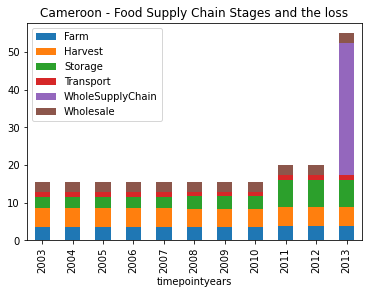

In [21]:
ax = df_sgnew1.plot.bar(stacked=True,title='Cameroon - Food Supply Chain Stages and the loss')
plt.legend(loc=2, prop={'size': 10})